In [ ]:
import numpy as np

class Perceptron:

  def __init__(self, teta, w, n, epochs):
    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self, train_x, train_y):
    for i in range(self.epochs):
      for j in range(len(train_x)):
        u = sum(np.array(self.w)*np.array(train_x[j])) - self.teta #Função de ativação
        y = 1 if (u>=0) else 0 #Função de saída
        erro = train_y[j]-y
        self.w = list(np.array(self.w) + (self.n*np.array(train_x[j])*erro))
        self.teta = self.teta + (self.n*(-1)*erro)

  def predict_perceptron(self, test_x):
    results=[]
    for i in range(len(test_x)):
      u=sum(np.array(self.w)*np.array(test_x[i])) - self.teta
      r=1 if (u>=0) else 0
      results.append(r)
    return(results)

### Perceptron para resolver o AND e o OR

In [ ]:
############# AND

x=np.array([[0,0], [1,0], [0,1], [1,1]])
#y=np.array([0, 0, 0, 1])

############# OR

y=np.array([0, 1, 1, 1])

In [ ]:
## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 2) Treinar o AND e depois fazer o predict com a matriz x
## 3) Treinar o OR e depois fazer o predict com a matriz x

#Resposta de 1)
modelo=Perceptron(0, [0,0], 0.05, 100)

#Resposta de 2) e 3)
modelo.train_perceptron(x,y)
modelo.predict_perceptron(x)


[0, 1, 1, 1]

### Base de Calssificação Sintética

In [ ]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)


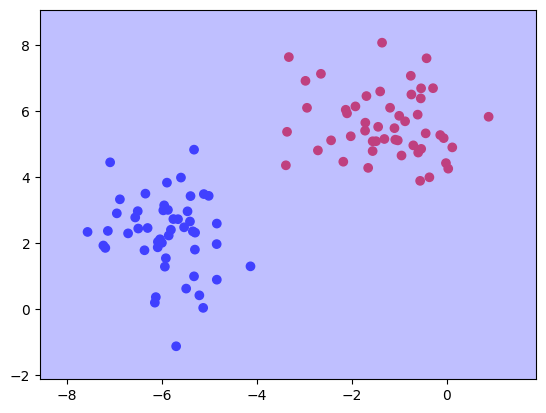

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) #Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 5) Treinar o Perceptron
## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"

#Resposta de 4)
modelo=Perceptron(0, [0,0], 0.05, 100)

#Resposta de 5)
modelo.train_perceptron(x, y)

#Resposta de 6)
plot_linear_classifier(x, y, [0,0], 0)

In [ ]:
from sklearn import metrics

## 7) Fazer o predict do Perceptron usando a matriz x
## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

#Resposta de 7)
resultados=modelo.predict_perceptron(x)

#Resposta de 8)
acertos=metrics.accuracy_score(resultados, y)
porcentagem=round(acertos*100)
print("{}%".format(porcentagem))

%100


### DataSet Sintético

(-0.1, 1.1)

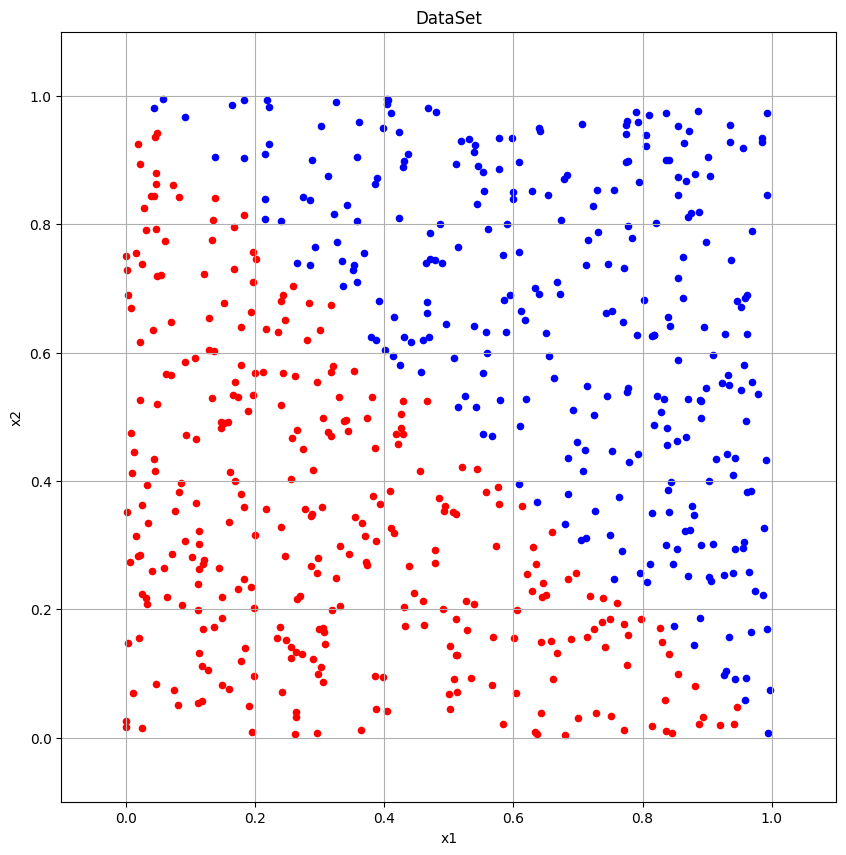

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

### Plotar o DataSet Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
  answer = int(np.sum(inputs)>1)
  return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('DataSet')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [ ]:
y=df['y'] #extrai a primeira coluna que é o label
X=df.loc[:,'x1':'x2']

In [ ]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
## 10) Inicializar o Perceptron com os parâmetros necessários
## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
## 12) Treinar o perceptron

#Resposta de 9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)

#Reposta de 10)
modelo=Perceptron(0, [0,0], 0.05, 100)

#Resposta de 11)
train_x = X_train.values.tolist()
test_x = X_test.values.tolist()
train_y = y_train.values.tolist()
test_y = y_test.values.tolist()

#Resposta de 12)
modelo.train_perceptron(train_x, train_y)

In [ ]:
from sklearn import metrics

## 13) Fazer o predict do Perceptron usando a matriz x
## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

#Resposta de 13)
resultados=modelo.predict_perceptron(test_x)

#Resposta de 14)
acertos=metrics.accuracy_score(resultados, test_y)
porcentagem=round(acertos*100)
print("{}%".format(porcentagem))

99%
